In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size and batch size
img_size = (224, 224)
batch_size = 2

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Raw strings to avoid Windows path issues
train_path = r"C:\Users\Asif Computer\OneDrive\Desktop\WasteDataSET\Train"
test_path = r"C:\Users\Asif Computer\OneDrive\Desktop\WasteDataSET\Test"

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=1,
    class_mode='binary'
)



Found 9 images belonging to 2 classes.
Found 3 images belonging to 2 classes.


In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load base VGG16 model (without top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier on top
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()




58889256/58889256 [==============================] - 97s 2us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [3]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10


5/5 [==============================] - 8s 922ms/step - loss: 0.7667 - accuracy: 0.5556 - val_loss: 0.3834 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 3s 664ms/step - loss: 0.5773 - accuracy: 0.5556 - val_loss: 0.3628 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 3s 683ms/step - loss: 0.6280 - accuracy: 0.5556 - val_loss: 0.4946 - val_accuracy: 0.6667
Epoch 4/10
5/5 [==============================] - 4s 842ms/step - loss: 0.2874 - accuracy: 0.7778 - val_loss: 0.3686 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 4s 784ms/step - loss: 0.1309 - accuracy: 1.0000 - val_loss: 0.3048 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 4s 800ms/step - loss: 0.3456 - accuracy: 0.7778 - val_loss: 0.3592 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 3s 696ms/step - loss: 0.0888 - accuracy: 1.0000 - val_loss: 0.4190 - val_accuracy: 0.6667
Epoch 8/10
5/5 [==

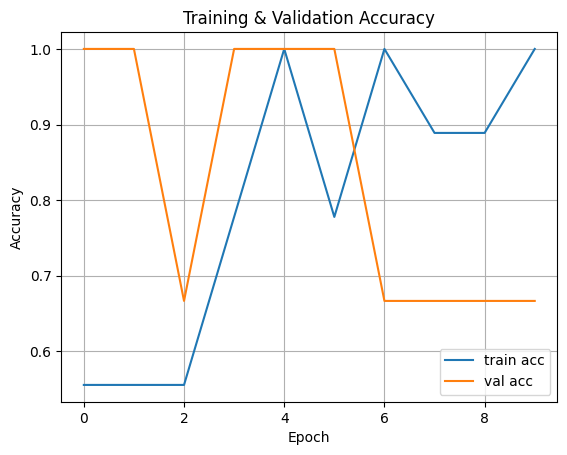

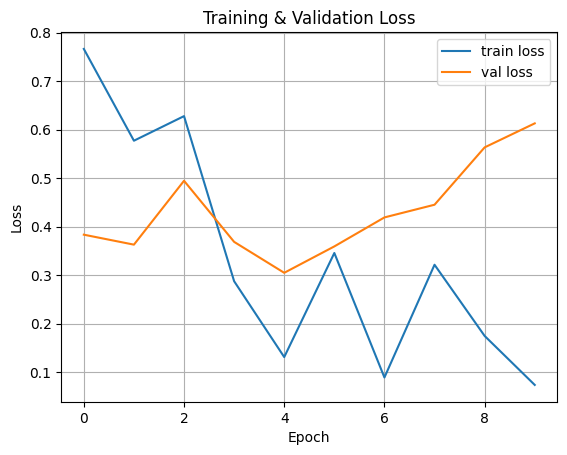

In [4]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
loss, acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {acc*100:.2f}%")


3/3 [==============================] - 1s 244ms/step - loss: 0.6131 - accuracy: 0.6667

Test Accuracy: 66.67%


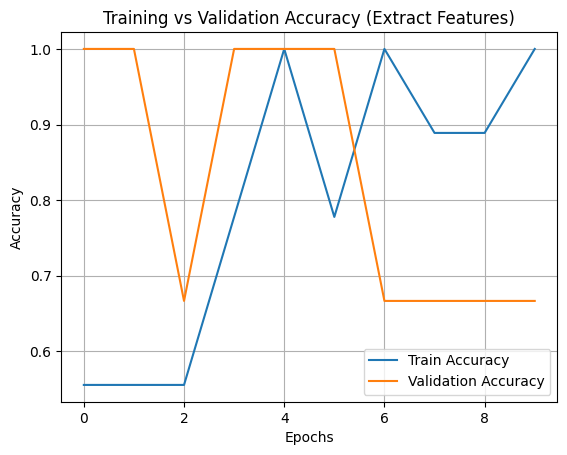

In [6]:
import matplotlib.pyplot as plt

# Accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy (Extract Features)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# ✅ Step 1: Unfreeze last 4 layers of VGG16
for layer in model.layers[-4:]:
    layer.trainable = True

# ✅ Step 2: Recompile with a lower learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Step 3: Fine-tune the model (5–10 more epochs)
history_fine = model.fit(
    train_generator,
    epochs=5,  # You can increase this if needed
    validation_data=test_generator
)


Epoch 1/5
5/5 [==============================] - 7s 953ms/step - loss: 0.1068 - accuracy: 1.0000 - val_loss: 0.4959 - val_accuracy: 0.6667
Epoch 2/5
5/5 [==============================] - 4s 846ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.4630 - val_accuracy: 0.6667
Epoch 3/5
5/5 [==============================] - 4s 745ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 0.4373 - val_accuracy: 0.6667
Epoch 4/5
5/5 [==============================] - 3s 717ms/step - loss: 0.0727 - accuracy: 1.0000 - val_loss: 0.4496 - val_accuracy: 0.6667
Epoch 5/5
5/5 [==============================] - 3s 700ms/step - loss: 0.0505 - accuracy: 1.0000 - val_loss: 0.4945 - val_accuracy: 0.6667


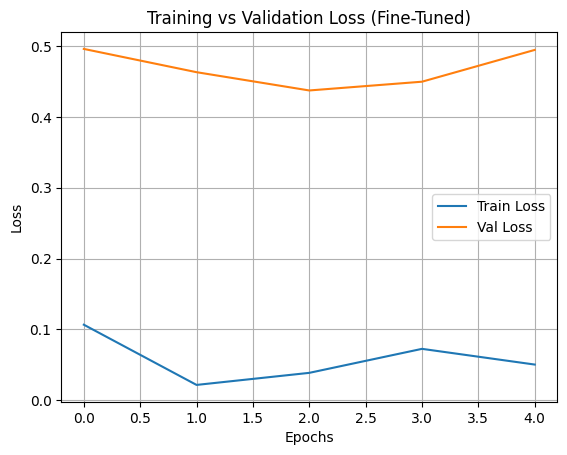

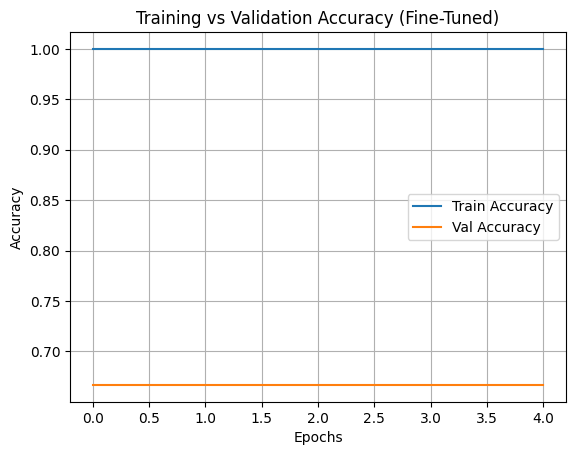

In [9]:
import matplotlib.pyplot as plt

# 🔁 Task 7: Loss Curves
plt.plot(history_fine.history['loss'], label='Train Loss')
plt.plot(history_fine.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss (Fine-Tuned)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 🔁 Task 8: Accuracy Curves
plt.plot(history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy (Fine-Tuned)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
